In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('news-dataset.csv',sep='\t')
df=pd.DataFrame(data)
print(df)

           category                              title  \
0          business    UK house prices dip in November   
1          business  LSE 'sets date for takeover deal'   
2             sport    Harinordoquy suffers France axe   
3          business  Barclays shares up on merger talk   
4          politics   Campaign 'cold calls' questioned   
...             ...                                ...   
1552       business  Hariri killing hits Beirut shares   
1553       politics  MPs issued with Blackberry threat   
1554  entertainment  Bollywood DVD fraudster is jailed   
1555          sport                Ireland v USA (Sat)   
1556           tech  Row brewing over peer-to-peer ads   

                                                content  
0      UK house prices dipped slightly in November, ...  
1      The London Stock Exchange (LSE) is planning t...  
2      Number eight Imanol Harinordoquy has been dro...  
3      Shares in UK banking group Barclays have rise...  
4      Labour

In [2]:
#checking missing data
if df.isnull().values.any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")

There are no missing values in the DataFrame.


In [3]:
print(df['category'])

0            business
1            business
2               sport
3            business
4            politics
            ...      
1552         business
1553         politics
1554    entertainment
1555            sport
1556             tech
Name: category, Length: 1557, dtype: object


In [4]:
print(df['title'])

0         UK house prices dip in November
1       LSE 'sets date for takeover deal'
2         Harinordoquy suffers France axe
3       Barclays shares up on merger talk
4        Campaign 'cold calls' questioned
                      ...                
1552    Hariri killing hits Beirut shares
1553    MPs issued with Blackberry threat
1554    Bollywood DVD fraudster is jailed
1555                  Ireland v USA (Sat)
1556    Row brewing over peer-to-peer ads
Name: title, Length: 1557, dtype: object


category
business         378
sport            365
politics         278
tech             269
entertainment    267
Name: count, dtype: int64


<BarContainer object of 5 artists>

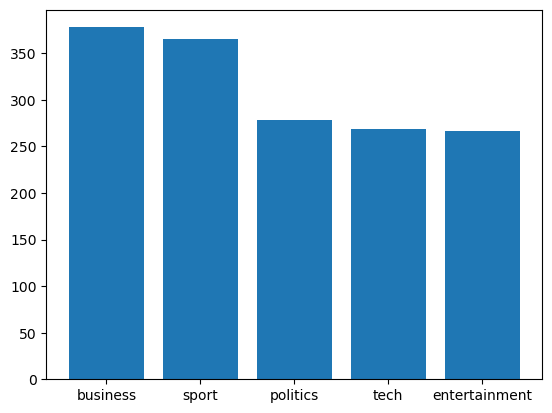

In [5]:
#visualize the distributions of news categories
import numpy as np
eda=df['category'].value_counts()
print(eda)
category=['business','sport','politics','tech','entertainment']
plt.bar(category,eda)

category
business         378
sport            365
politics         278
tech             269
entertainment    267
Name: count, dtype: int64


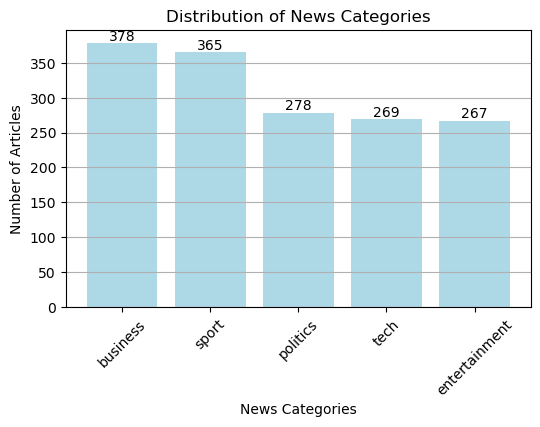

In [6]:
eda = eda.reindex(category, fill_value=0)
print(eda)
# Create a bar plot
plt.figure(figsize=(6, 3.6))
bars = plt.bar(eda.index, eda.values, color='lightblue')
plt.xlabel('News Categories')
plt.ylabel('Number of Articles')
plt.title('Distribution of News Categories')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Adding data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.show()

In [7]:
#analyzing minimal/maximal/average length of news contents, titles
df['title_length'] = df['title'].apply(len)
df['content_length'] = df['content'].apply(len)
title_min=df['title_length'].min()
title_max=df['title_length'].max()
title_mean=df['title_length'].mean()
print('Minimal length of news title is {:.3f}.'.format(title_min))
print('Maximal length of news title is {:.3f}.'.format(title_max))
print('Mean length of news title is {:.3f}.'.format(title_mean))
content_min=df['content_length'].min()
content_max=df['content_length'].max()
content_mean=df['content_length'].mean()
print('Minimal length of news content is {:.3f}.'.format(content_min))
print('Maximal length of news content is {:.3f}.'.format(content_max))
print('Mean length of news content is {:.3f}.'.format(content_mean))

Minimal length of news title is 16.000.
Maximal length of news title is 52.000.
Mean length of news title is 31.385.
Minimal length of news content is 471.000.
Maximal length of news content is 25454.000.
Mean length of news content is 2209.117.


List of Words in Bag-of-Words Model:
         word  frequency
0        said       5044
1          mr       2102
2        year       1588
3      people       1406
4         new       1344
5        time        900
6       world        831
7  government        801
8          uk        724
9        just        671


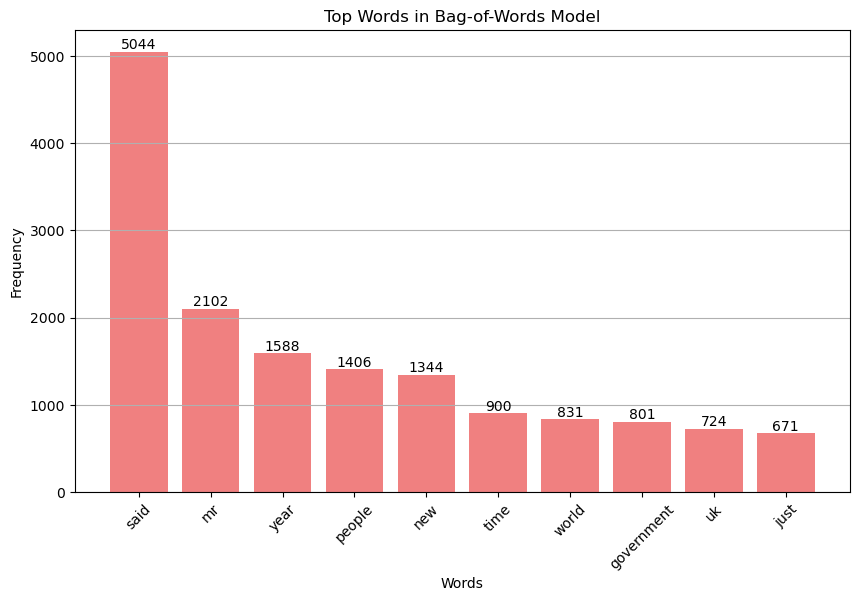

In [8]:
#BoW
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')

X = vectorizer.fit_transform(df['content'])

word_freq_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate total word frequencies
total_word_freq = word_freq_df.sum().sort_values(ascending=False)

# Reset index for better readability
total_word_freq_df = total_word_freq.reset_index()
total_word_freq_df.columns = ['word', 'frequency']

# Print the top N words in Bag-of-Words model
top_n = 10  # Change this to display more words if needed
print("List of Words in Bag-of-Words Model:")
print(total_word_freq_df.head(top_n))

# Plotting the top N words by frequency
plt.figure(figsize=(10, 6))
bars = plt.bar(total_word_freq_df['word'][:top_n], total_word_freq_df['frequency'][:top_n], color='lightcoral')

# Adding text annotations on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Words in Bag-of-Words Model')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


List of Words in TF-IDF Model:
         word  mean_tfidf
0        said    0.039739
1          mr    0.026641
2        year    0.019308
3      people    0.016968
4         new    0.015713
5        film    0.013381
6  government    0.013132
7       world    0.012537
8        time    0.011955
9          uk    0.011634


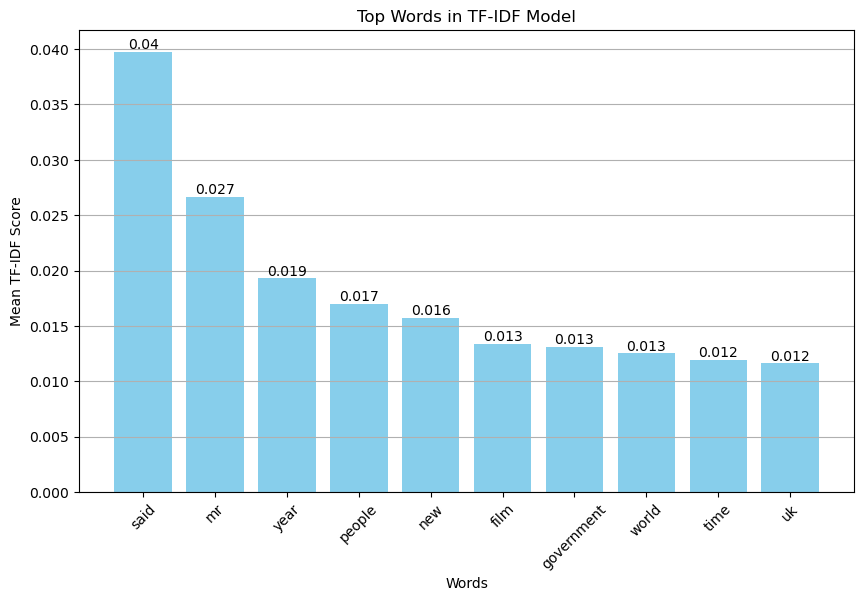

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Sample DataFrame creation for demonstration (remove if you already have df)
# df = pd.DataFrame({'content': ['This is a sample text', 'Another sample text for testing', 'Text data is important']})

# Initialize TfidfVectorizer with stop words
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the text data
X = vectorizer.fit_transform(df['content'])

# Create a DataFrame of TF-IDF scores
tfidf_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Calculate the mean TF-IDF score for each word
mean_tfidf = tfidf_df.mean().sort_values(ascending=False)

# Reset index for better readability
mean_tfidf_df = mean_tfidf.reset_index()
mean_tfidf_df.columns = ['word', 'mean_tfidf']


# Plotting the top 10 words by mean TF-IDF score
top_n = 10  # Change this to display more words if needed
print("List of Words in TF-IDF Model:")
print(mean_tfidf_df.head(top_n))

# Plotting the top N words by mean TF-IDF score
plt.figure(figsize=(10, 6))
bars = plt.bar(mean_tfidf_df['word'][:top_n], mean_tfidf_df['mean_tfidf'][:top_n], color='skyblue')

# Adding text annotations on the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')

plt.xlabel('Words')
plt.ylabel('Mean TF-IDF Score')
plt.title('Top Words in TF-IDF Model')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [10]:
#TF-IDF
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
data=pd.read_csv('news-dataset.csv',sep='\t')
df=pd.DataFrame(data)
# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the documents
tfidf_matrix = tfidf_vectorizer.fit_transform(df['content'])

# Convert the TF-IDF matrix to a DataFrame for better readability
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

# Display the TF-IDF DataFrame
print(tfidf_df.head())

tfidf_sum = tfidf_df.sum().sort_values(ascending=False)

# Convert the Series to a DataFrame for better readability
top_words_df = pd.DataFrame(tfidf_sum).reset_index()
top_words_df.columns = ['Word', 'Total_TF-IDF']

# Display the top N words with the highest TF-IDF scores
top_n = 10  # You can change this to any number you want
print(top_words_df.head(top_n))

    00       000  0001  000bn  000m  000s  000th  0051  007   01  ...  zooms  \
0  0.0  0.000000   0.0    0.0   0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0   
1  0.0  0.000000   0.0    0.0   0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0   
2  0.0  0.000000   0.0    0.0   0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0   
3  0.0  0.030228   0.0    0.0   0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0   
4  0.0  0.000000   0.0    0.0   0.0   0.0    0.0   0.0  0.0  0.0  ...    0.0   

   zooropa  zornotza  zorro  zubair  zuluaga  zurich  zutons  zvonareva  \
0      0.0       0.0    0.0     0.0      0.0     0.0     0.0        0.0   
1      0.0       0.0    0.0     0.0      0.0     0.0     0.0        0.0   
2      0.0       0.0    0.0     0.0      0.0     0.0     0.0        0.0   
3      0.0       0.0    0.0     0.0      0.0     0.0     0.0        0.0   
4      0.0       0.0    0.0     0.0      0.0     0.0     0.0        0.0   

   zvyagintsev  
0          0.0  
1          0.0  
2          0.0  


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the dataset
X = df['title']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to the data
grid_search.fit(X_train_vectorized, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred))

from sklearn.metrics import classification_report, f1_score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-score: {f1:.4f}")



Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
               precision    recall  f1-score   support

     business       0.86      0.63      0.73        70
entertainment       0.81      0.53      0.64        40
     politics       0.92      0.59      0.72        61
        sport       0.46      0.93      0.62        81
         tech       0.94      0.53      0.68        60

     accuracy                           0.67       312
    macro avg       0.80      0.64      0.68       312
 weighted avg       0.78      0.67      0.68       312

Weighted F1-score: 0.6767


In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# Sample DataFrame creation for demonstration (remove this if you already have df)
# df = pd.DataFrame({'title': ['This is a title', 'Another title here', 'More titles for testing'], 
#                    'category': ['business', 'tech', 'business']})

# Split the dataset
X = df['title']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Optional: using stop words
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to the data
grid_search.fit(X_train_vectorized, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate and print the weighted F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-score: {f1:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 50}
               precision    recall  f1-score   support

     business       0.81      0.69      0.74        70
entertainment       0.77      0.57      0.66        40
     politics       0.92      0.59      0.72        61
        sport       0.49      0.91      0.64        81
         tech       0.91      0.52      0.66        60

     accuracy                           0.68       312
    macro avg       0.78      0.66      0.68       312
 weighted avg       0.76      0.68      0.69       312

Weighted F1-score: 0.6852


In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the dataset
X = df['content']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50,100,200],
    'max_depth': [None,10,20,30],
    'min_samples_split': [2,5,10]
}

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to the data
grid_search.fit(X_train_vectorized, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-score: {f1:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': 30, 'min_samples_split': 5, 'n_estimators': 200}
               precision    recall  f1-score   support

     business       0.94      0.97      0.96        70
entertainment       0.97      0.97      0.97        40
     politics       0.97      0.97      0.97        61
        sport       0.96      0.99      0.98        81
         tech       1.00      0.93      0.97        60

     accuracy                           0.97       312
    macro avg       0.97      0.97      0.97       312
 weighted avg       0.97      0.97      0.97       312

Weighted F1-score: 0.9679


In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# Sample DataFrame creation for demonstration (remove this if you already have df)
# df = pd.DataFrame({'title': ['This is a title', 'Another title here', 'More titles for testing'], 
#                    'category': ['business', 'tech', 'business']})

# Split the dataset
X = df['content']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Optional: using stop words
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to the data
grid_search.fit(X_train_vectorized, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate and print the weighted F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-score: {f1:.4f}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters found:  {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
               precision    recall  f1-score   support

     business       0.96      0.97      0.96        70
entertainment       0.97      0.97      0.97        40
     politics       0.97      0.98      0.98        61
        sport       0.96      0.99      0.98        81
         tech       1.00      0.93      0.97        60

     accuracy                           0.97       312
    macro avg       0.97      0.97      0.97       312
 weighted avg       0.97      0.97      0.97       312

Weighted F1-score: 0.9711


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Split the dataset
X = df['title']+df['content']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization
vectorizer = CountVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to the data
grid_search.fit(X_train_vectorized, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred))

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-score: {f1:.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, f1_score

# Sample DataFrame creation for demonstration (remove this if you already have df)
# df = pd.DataFrame({'title': ['This is a title', 'Another title here', 'More titles for testing'], 
#                    'category': ['business', 'tech', 'business']})

# Split the dataset
X = df['title'] + df['content']
y = df['category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text vectorization using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')  # Optional: using stop words
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Set up the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2)

# Fit GridSearch to the data
grid_search.fit(X_train_vectorized, y_train)

# Best parameters from Grid Search
print("Best parameters found: ", grid_search.best_params_)

# Make predictions with the best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_vectorized)

# Evaluate the model
print(classification_report(y_test, y_pred))

# Calculate and print the weighted F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Weighted F1-score: {f1:.4f}")


### As a result, only using content as the feature and apply TF-IDF
